In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 2: Dimensionality Reduction

[2.1] Reducing the dimensionality of the dataset to two dimensions using a) Autoencoders

In [52]:
df = pd.read_csv('nba_2022-23_stats_cleaned.csv')
df.head()

,Rank,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,2,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,3,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,4,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,5,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

**Data Preprocessing:** Drop non-numeric columns and normalise the data as Autoencoders work best with scaled data.

In [54]:
# Drop non-numeric columns
features = df.drop(columns=['Player Name', 'Team', 'Position'])

# Normalise the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features


array([[-1.72833794,  3.71021079,  1.91346367, ...,  0.08369815,
         1.81580574,  3.56512586],
       [-1.72090423,  3.64248807,  1.44563887, ..., -0.13917807,
         0.04860224, -0.37232779],
       [-1.71347052,  3.61765443,  1.91346367, ..., -0.00545234,
         0.33297981,  0.56923721],
       ...,
       [ 1.71347052, -0.78165715,  0.74390167, ..., -0.76323149,
        -0.41858949, -0.45792461],
       [ 1.72090423, -0.78411844, -0.65957273, ..., -0.58493051,
        -0.11389923, -0.45792461],
       [ 1.72833794, -0.78411844, -0.42566033, ...,  0.79690206,
        -0.94671927, -0.45792461]])

**Build the Autoencoder Model:** Define an Autoencoder with an encoding dimension of 2.

- Explanation of Layer Sizes:
    - The initial layer sizes (32, 16, and 8) allow a gradual reduction, which helps the model learn to compress data effectively without losing too much information.
    - The encoding layer is set to 2 neurons to achieve your goal of reducing the data to two dimensions.
    - This structure allows the model to distill information effectively from the 49 features down to just 2 while minimizing reconstruction loss.

In [55]:
input_dim = scaled_features.shape[1]
print(f'Input dimension: {input_dim}')

encoding_dim = 2 # Target dimension
print(f'Encoding target dimension: {encoding_dim}')

input_layer = Input(shape=(input_dim,))

# Encode layers with progressive reduction in dimensions
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded) # Final 2D encoding

# Decode layers with progressive increase in dimensions back to 49 features
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded) # Output layer for reconstruction

# Define the autoencoder model
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

Input dimension: 49
Encoding target dimension: 2


**Train the Autoencoder:**

In [56]:
autoencoder.fit(scaled_features, scaled_features, epochs=200, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.0064 - val_loss: 2.2583
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0133 - val_loss: 2.2385
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9888 - val_loss: 2.1828
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9245 - val_loss: 2.0454
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9087 - val_loss: 1.8177
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8197 - val_loss: 1.6608
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7484 - val_loss: 1.6111
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7311 - val_loss: 1.5974
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6668 - val_loss: 1.5955
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6839 - val_loss: 1.5963
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6951 - val_loss: 1.5973
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

**Extract the Encoded (Reduced) Data:** After training, use encoder of model to get reduced data and convert reduced data to new DataFrame for easier handling.

In [57]:
reduced_features = encoder.predict(scaled_features)
print(f'Reduced features: {reduced_features}')

# Convert the reduced features to a DataFrame
reduced_df = pd.DataFrame(reduced_features, columns=[f'feature_{i}' for i in range(encoding_dim)])

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Reduced features: [[2.99984970e+01 3.48173561e+01]
 [3.34741249e+01 1.71086903e+01]
 [1.97675552e+01 1.76700630e+01]
 [1.88616333e+01 2.39426422e+01]
 [1.74267426e+01 2.16808281e+01]
 [2.29991817e+01 2.19518261e+01]
 [1.61211433e+01 1.93277073e+01]
 [2.29924831e+01 2.49884911e+01]
 [7.28759527e+00 1.43745079e+01]
 [3.41932602e+01 3.91989555e+01]
 [2.96253643e+01 2.71213684e+01]
 [2.59977932e+01 2.86241627e+01]
 [1.80086470e+00 1.68101573e+00]
 [2.17070656e+01 1.96648388e+01]
 [2.74555874e+00 3.72703671e+00]
 [1.05769053e+01 1.80178757e+01]
 [1.27843552e+01 1.09435482e+01]
 [4.09582329e+01 1.85404282e+01]
 [3.53879242e+01 3.61063080e+01]
 [2.56275806e+01 2.61304855e+01]
 [8.20346069e+00 6.47168922e+00]
 [1.44526720e+01 1.85305328e+01]
 [3.12291598e+00 3.05654907e+00]
 [2.14916859e+01 2.34794235e+01]
 [1.26921263e+01 1.47274113e+01]
 [2.51457272e+01 2.71476078e+01]
 [1.47780161e+01 1.23612766e+01]
 [8.58087158e+00 1.74919529e+01]
 [2.52979851e+01 2

**Visualising the Reduced Dataset:** Applying K-Means clustering and plotting the reduced dataset with clusters.

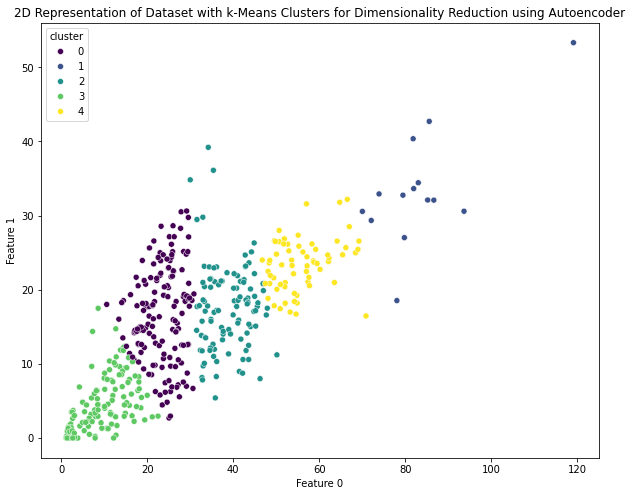

In [58]:
# Apply KMeans clustering to the reduced features
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(reduced_df)

# Add the cluster labels to the DataFrame
reduced_df['cluster'] = clusters

# Plotting reduced features with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='feature_0', y='feature_1', data=reduced_df, hue='cluster', palette='viridis')
plt.title('2D Representation of Dataset with k-Means Clusters for Dimensionality Reduction using Autoencoder')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('Question_2_Plots/Autoencoder_Clustering_2-1-a.pdf')
plt.show()

b) Autoencoder + self-organising maps (SOMs)

In [59]:
from minisom import MiniSom

Apply Self-Organizing Maps

In [60]:
# Apply Self-Organizing Maps (SOM) to the reduced features
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(reduced_features)
som.train_random(reduced_features, 100)

In [61]:
# Determinethe winning nodes for each input vector
winning_nodes = np.array([som.winner(x) for x in reduced_features])

In [69]:
# Convert to DataFrame for easier handling
som_df = pd.DataFrame(winning_nodes, columns=['feature 1', 'feature 2'])

In [63]:
# # Extract the 2D coordinates of the SOM nodes
# som_coordinates = np.array([[som.winner(x) for x in reduced_features]]).reshape(-1, 2)
# som_df = pd.DataFrame(som_coordinates, columns=['feature 1', 'feature 2'])
# display(som_df)

In [70]:
# Apply k-Means clustering to the SOM coordinates
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(som_df)

som_df['cluster'] = clusters
display(som_df)

,feature 1,feature 2,cluster
0,5,0,1
1,4,6,4
2,8,3,1
3,6,2,1
4,6,2,1
...,...,...,...
461,7,5,3
462,0,0,2
463,9,6,3
464,0,6,0


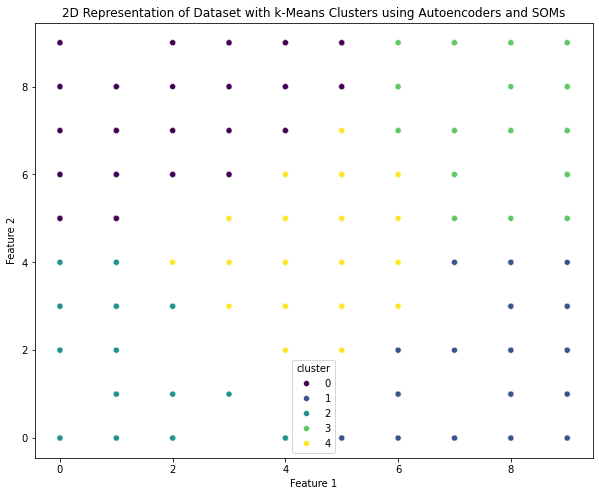

In [71]:
# Plotting SOM coordinates with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='feature 1', y='feature 2', data=som_df, hue='cluster', palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Representation of Dataset with k-Means Clusters using Autoencoders and SOMs')
plt.show()